<a href="https://colab.research.google.com/github/AthithyaJB/AthithyaJB/blob/main/DP_Week02_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 - Lab

* Our **Task** for this week is to fit a polynomial curve to data. This is called **curve fitting** and has numerous applications in Data Science, Statistics and Machine Learning. We will solve curve fitting in two ways: the manual approach and one which is much easier using Automatic Differentiation. 
* This week will be the only time that we calculate the derivatives manually!
* The Learning Outcome: Hands-on application of Automatic Differentiation.

## Creating the data

* Let us first create some data using a known function. We will use the **sinusoidal** function $y=f(x)=sin(x)$. 
    * x is the input to the function and y is the output of the function.
* The following code generates and plots our data. 

In [1]:
import torch
import math
import matplotlib.pyplot as plt
%matplotlib inline

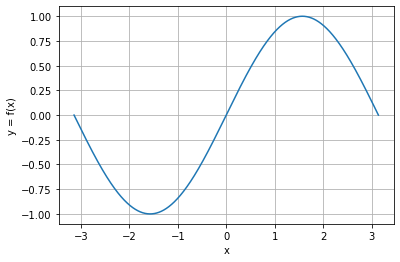

In [2]:
# Create input data x and output (target) data y
N = 2000 # number of samples
x = torch.linspace(-math.pi, math.pi, N, dtype=torch.float32)
y = torch.sin(x);
plt.plot(x, y);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Task

* Let's assume that we do not know the function that generated the target $y$ from input $x$. That is we do not know that $y$ and $x$ are related through the function $y=sin(x)$.
* We are just given the value pais $(x_i, y_i), i=1,\dots,N$.
* Our goal is find a polynomial curve that can fit the pais $(x_i, y_i)$ as accurately as possible.
* A polynomial (of degree 3) is given by the following formula:
$$P_3(x)= w_0 + w_1x + w_2x^2 + w_3x^3$$
where $w_0, w_1, w_2, w_3$ are the weights (our model parameters).
* By changing the weights different polynomial curves can be obtained!

tensor(0.3661) tensor(-0.1998) tensor(1.9582) tensor(0.1843)
tensor([14.6050, 14.5828, 14.5607,  ..., 24.6702, 24.7253, 24.7805])
tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])


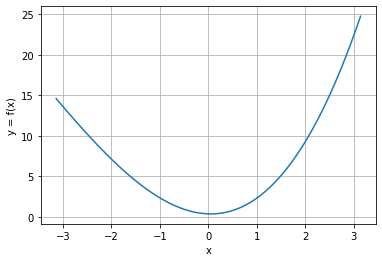

In [4]:
# Run this cell multiple times to see how different polynomial curves look like 

# Randomly initialize weights
w0 = torch.randn((), dtype=torch.float32)
w1 = torch.randn((), dtype=torch.float32)
w2 = torch.randn((), dtype=torch.float32)
w3 = torch.randn((), dtype=torch.float32)
y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3
print(w0,w1,w2,w3)
print(y_hat)
print(x)
# Plot the polynomial curve 
plt.plot(x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## Partial Derivatives of the Loss
* We want to find the weights so that the polynomial curve becomes "as close as possible" to the sinusodial function. 
* "As close as possible" is defined with the $L_2$ loss: $$L_2=\sum_{i=1}^N (\tilde{y}_i - y_i)^2$$ where $\tilde{y}_i =w_0 + w_1x_i + w_2x_i^2 + w_3x_i^3$
* To set up an algorithm to find the weights, we need to write some code that will compute the derivative of the loss with respect to the weights.
* But first we actually need the math formulas that express the derivative of the loss with respect to each weight. This is the subject of the first exercise.
* Your task: calculate the partial derivative of the loss with respect to each of the weights:
  $$\frac{\partial L}{\partial w_0} = \frac{\partial L}{\partial zi}$$
  $$\frac{\partial L}{\partial w_1} = \frac{\partial L  * xi }{\partial zi},$$
  $$\frac{\partial L}{\partial w_2} = \frac{\partial L * xi ** 2}{\partial zi},$$
  $$\frac{\partial L}{\partial w_3} = \frac{\partial L * xi ** 3}{\partial zi}$$
  with $$\frac{\partial L}{\partial z_i}= ??.$$

## The Algorithm  

With the expressions derived above, we can find the weights by executing the following algorithm for 2000 iterations:

- Step 1: Calculate prediction $\tilde{y}_i, i=1,\ldots,N$ with current weights (forward pass) 
- Step 2: Calculate the derivative of the loss with respect to $\tilde{y}_i$ using the formula derived above.
- Step 3: Calculate the derivative of the loss with respect to the weights using the formula derived above.
- Step 4: Update the weights as follows:
$$ w_0 \leftarrow w_0 - lr \cdot \frac{\partial L}{\partial w_0},$$
$$ w_1 \leftarrow w_1 - lr \cdot \frac{\partial L}{\partial w_1},$$
$$ w_2 \leftarrow w_2 - lr \cdot \frac{\partial L}{\partial w_2},$$
$$ w_3 \leftarrow w_3 - lr \cdot \frac{\partial L}{\partial w_3},$$
where lr is a constant which is called the *learning rate*. We set it to $1\mathrm{e}{-6}$.


In [11]:
# Randomly initialize weights
w0 = torch.randn((), dtype=torch.float32)
w1 = torch.randn((), dtype=torch.float32)
w2 = torch.randn((), dtype=torch.float32)
w3 = torch.randn((), dtype=torch.float32)

# Fill in the gaps denoned with ?? by writing your code
lr = 1e-7 # learning rate
for t in range(2000):
    # Step 1. Calculate prediction y with current weights (forward pass).
    y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3

    # Compute and print loss
    loss = (y_hat - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
        
    # Step 2. Calculate the derivative of the loss with respect to y_hat.
    # Write your code here:
    grad_y_hat = 2*(y_hat-y)
    
    # Step 3. Calculate the derivative of the loss with respect to the weights.
    # Write your code here:
    grad_w0 = (grad_y_hat).sum()
    grad_w1 = (grad_y_hat*x).sum()
    grad_w2 = (grad_y_hat*x.pow(2)).sum()
    grad_w3 = (grad_y_hat*x.pow(3)).sum()
    
    # Step 4. Update the weights (using gradient descent).
    # Write your code here:
    w0 = w0 - lr * grad_w0 
    w1 = w1 - lr * grad_w1
    w2 = w2 - lr * grad_w2
    w3 = w3 - lr * grad_w3


print(f'Result: y = {w0.item()} + {w1.item()} x + {w2.item()} x^2 + {w3.item()} x^3')

99 384.65643310546875
199 355.5494079589844
299 339.0436096191406
399 325.2297058105469
499 312.3764343261719
599 300.1220703125
699 288.37786865234375
799 277.1104736328125
899 266.29815673828125
999 255.9219512939453
1099 245.96426391601562
1199 236.4081268310547
1299 227.2373504638672
1399 218.4363555908203
1499 209.9902801513672
1599 201.88473510742188
1699 194.10597229003906
1799 186.64096069335938
1899 179.47689819335938
1999 172.60166931152344
Result: y = 0.07451367378234863 + 0.46859145164489746 x + -0.012854850850999355 x^2 + -0.038119520992040634 x^3


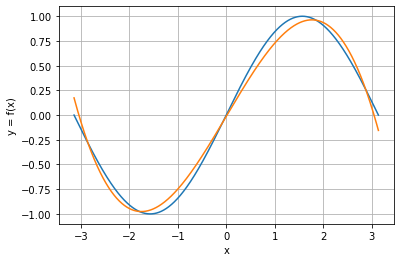

In [8]:
# Show predictions with final weights
# This will not work unless you make the code in the previous cell work first!)
y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3
plt.plot(x, y, x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Algorithm  using Automatic Differentiation

* In the previous algorithm we had to provide mathematical formulas for the derivatives of the loss with respect to $\tilde{y}_i$ and the weights.
* We also had to code the formulas.
* We can avoid all of the above using PyTorch's Automatic Differentiation.
* Modify the previous algotithm as follows:
    1. Initialize the weights as above but also set `requires_grad=True`. This will indicate to PyTorch that it must calculate gradients for these variables. 
    1. Calculate the `loss` and call `loss.backward()`. 
    1. The calculcated gradients for each weight are stored in .grad (for example $\dfrac{\partial L}{\partial w_0}$ is stored in `w_0.grad`. Using the automatically calculated gradients update the weights as above.
    1. Set all the gradients for the weights to zero

In [14]:
# Modification 1: Initialize the weights as above but set requires_grad=True
# Write your code here:
w0 = torch.randn((), dtype=torch.float32, requires_grad=True)
w1 = torch.randn((), dtype=torch.float32, requires_grad=True)
w2 = torch.randn((), dtype=torch.float32, requires_grad=True)
w3 = torch.randn((), dtype=torch.float32, requires_grad=True)

# Fill in the gaps denoned with ?? by writing your code
lr = 1e-6 # learning rate
for t in range(2000):
    # Calculate prediction y with current weights (forward pass).
    y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3

    # Compute and print loss
    loss = (y_hat - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
   
    # Modification 2: call backward() on loss
    # Write your code here:
    loss.backward()
    
    # The update of the weights should not create new gradients
    # For this reason we need to use torch.no_grad()
    with torch.no_grad():
        # Modification 3: Using the automatically calculated gradients update the weights as above.
        # Write your code here:
        w0 -= lr * w0.grad
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

    # Modification 4: set all the gradients for the weights to zero
    # Write your code here:
    w0.grad.zero_()
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()

print(f'Result: y = {w0.item()} + {w1.item()} x + {w2.item()} x^2 + {w3.item()} x^3')

99 206.86729431152344
199 146.10574340820312
299 104.07705688476562
399 74.97660064697266
499 54.807472229003906
599 40.8150634765625
699 31.09870147705078
799 24.345483779907227
899 19.647628784179688
999 16.376747131347656
1099 14.097545623779297
1199 12.508106231689453
1299 11.398823738098145
1399 10.624086380004883
1499 10.082623481750488
1599 9.7039213180542
1699 9.438899993896484
1799 9.253313064575195
1899 9.123278617858887
1999 9.032114028930664
Result: y = -0.0146329952403903 + 0.8614864349365234 x + 0.002524434356018901 x^2 + -0.09400540590286255 x^3


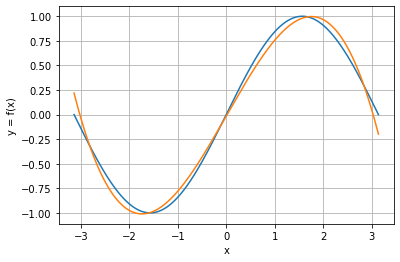

In [15]:
# Show predictions with final weights
# This will not work unless you make the code in the previous cell work first!)
w0.detach_()
w1.detach_()
w2.detach_()
w3.detach_()

y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3
plt.plot(x, y, x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');